In [2]:
import xarray as xr
%matplotlib inline
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [20., 10.]

In [3]:
filename = "data/Grace/grd_files_to_interp/GypsumP_100.grd"

In [4]:
df = xr.open_dataset(filename)

In [5]:
df

<xarray.Dataset>
Dimensions:  (lat: 165, lon: 328)
Coordinates:
  * lon      (lon) float64 -180.0 -178.9 -177.8 -176.7 ... 177.8 178.9 180.0
  * lat      (lat) float64 -90.0 -88.9 -87.8 -86.71 ... 86.71 87.8 88.9 90.0
Data variables:
    z        (lat, lon) float32 ...
Attributes:
    Conventions:  COARDS/CF-1.0
    title:        GypsumP_100.grd
    history:      xyz2grd -V -Rd -I1.1 GypsumP_175.txt -GGypsumP_100.grd
    GMT_version:  4.5.5 [64-bit]

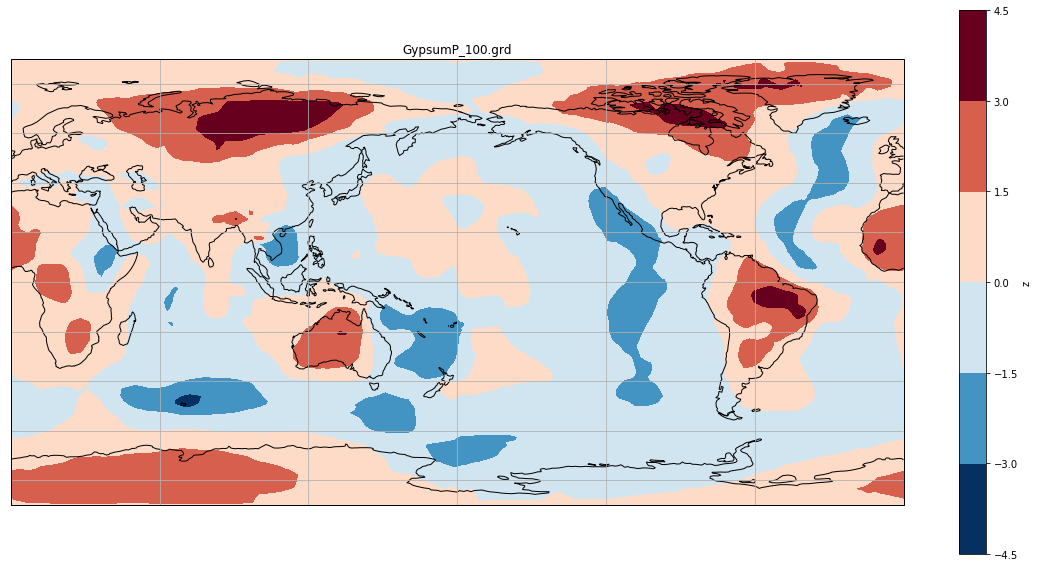

In [6]:
mpl.rcParams['figure.figsize'] = [20., 10.]
df.z.plot.contourf()
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
ax = plt.axes(projection=ccrs.PlateCarree(central_longitude=180))
df.z.plot.contourf(ax=ax,
                   transform=ccrs.PlateCarree())
ax.set_title(df.title)
ax.coastlines()
ax.gridlines()

In [7]:
df.z.max()

<xarray.DataArray 'z' ()>
array(4.45295)

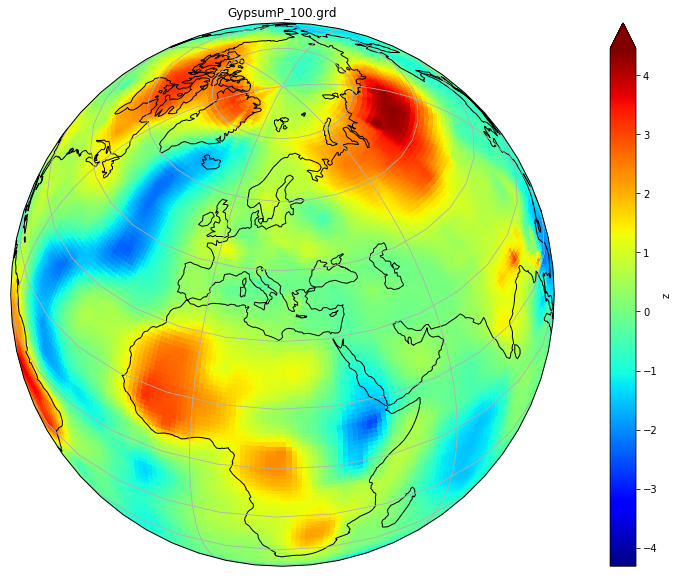

In [8]:
import os
import xarray as xr
import numpy as np
import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import matplotlib.pyplot as plt

%matplotlib inline

filename = "data/Grace/grd_files_to_interp/GypsumP_100.grd"
dset = xr.open_dataset(filename, decode_cf=False)
z = dset['z'][:,:]
dset.close()

zmin =  dset['z'].min()
zmax = dset['z'].max()


fig = plt.figure(figsize=[20, 10])
ax = fig.add_subplot(1, 1, 1, projection=ccrs.Orthographic(central_longitude=20, central_latitude=40))  # specify (nrows, ncols, axnum)

z.plot.pcolormesh(ax=ax,
                      transform=ccrs.PlateCarree(), 
                      extend='max', vmin=zmin, vmax = zmax, 
                      cmap='jet')

ax.set_title(df.title)
ax.coastlines()
ax.gridlines()

In [9]:
import glob
def getint(name):
    _, num = name.split('P_')
    num, _ = num.split('.')
    return int(num)

filenames = glob.glob("data/Grace/grd_files_to_interp/GypsumP_*.grd")

filenames = sorted(filenames, key=getint)


In [10]:
print(len(filenames))

21


# Step-1

- Read all the netCDF files and create 3D "image"
- Interpolate by the depth 

In [11]:
import k3d
import numpy as np
import xarray as xr
img = np.zeros((21,165, 328))
for ix, filename in enumerate(filenames):
    print(ix, filename)
    dset = xr.open_dataset(filename, decode_cf=False)
    img[ix,:,:] = dset['z'][:,:]
    dset.close()


0 data/Grace/grd_files_to_interp/GypsumP_100.grd
1 data/Grace/grd_files_to_interp/GypsumP_175.grd
2 data/Grace/grd_files_to_interp/GypsumP_250.grd
3 data/Grace/grd_files_to_interp/GypsumP_325.grd
4 data/Grace/grd_files_to_interp/GypsumP_400.grd
5 data/Grace/grd_files_to_interp/GypsumP_525.grd
6 data/Grace/grd_files_to_interp/GypsumP_650.grd
7 data/Grace/grd_files_to_interp/GypsumP_750.grd
8 data/Grace/grd_files_to_interp/GypsumP_850.grd
9 data/Grace/grd_files_to_interp/GypsumP_1000.grd
10 data/Grace/grd_files_to_interp/GypsumP_1150.grd
11 data/Grace/grd_files_to_interp/GypsumP_1300.grd
12 data/Grace/grd_files_to_interp/GypsumP_1450.grd
13 data/Grace/grd_files_to_interp/GypsumP_1600.grd
14 data/Grace/grd_files_to_interp/GypsumP_1750.grd
15 data/Grace/grd_files_to_interp/GypsumP_1900.grd
16 data/Grace/grd_files_to_interp/GypsumP_2050.grd
17 data/Grace/grd_files_to_interp/GypsumP_2200.grd
18 data/Grace/grd_files_to_interp/GypsumP_2350.grd
19 data/Grace/grd_files_to_interp/GypsumP_2500.grd

# Step-2

- 3D plots of anomalies (z)

In [12]:
img.shape

(21, 165, 328)